# Inferential Statistics - Project Supporting File 

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

from statsmodels.stats.multicomp import MultiComparison

import warnings
warnings.filterwarnings("ignore")

# Problem 1
#### A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected


|                       | Striker | Forward | Attacking Midfielder  | Winger | Total |
|-----------------------|---------|---------|-----------------------|--------|-------|
| Players Injured       | 45      | 56      | 24                    | 20     | 145   |
| Players Not Injured   | 32      | 38      | 11                    | 9      | 90    |
| Total                 | 77      | 94      | 35                    | 29     | 235   

#### Based on the above data, answer the following questions.

#### 1.1 What is the probability that a randomly chosen player would suffer an injury?

#### 1.2 What is the probability that a player is a forward or a winger?

#### 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

#### 1.4 What is the probability that a randomly chosen injured player is a striker?

In [2]:
# 1.1 What is the probability that a randomly chosen player would suffer an injury?

P_Injury = (145/235)*100
P_Injury = round(P_Injury,2)
print(f'{P_Injury}%')

61.7%


In [3]:
# 1.2 What is the probability that a player is a forward or a winger?

# Number of forward players = 94
# Number of Wingers = 29

P_Forward = 94/235
P_Winger = 29/235
P_Forward_Winger = (P_Forward + P_Winger)*100
P_Forward_Winger = round(P_Forward_Winger, 2)
print(f'{P_Forward_Winger}%')

52.34%


In [4]:
# 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

# Number of strikers with injury is 45

P_Striker_Injury = (45/235) * 100
P_Striker_Injury = round(P_Striker_Injury,2)
print(f'{P_Striker_Injury}%')

19.15%


In [5]:
# 1.4 What is the probability that a randomly chosen injured player is a striker?

# Total number of injured players = 145
# Total number of injured strikers = 45

P_Injured_Striker = (45/145) * 100
P_Injured_Striker = round(P_Injured_Striker, 2)
print(f'{P_Injured_Striker}%')

31.03%


# Problem 2
#### The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

#### 2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

#### 2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

#### 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

#### 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [6]:
#  From the Problem Statement

mean_q2 = 5
sd_q2 = 1.5

In [7]:
# 2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

Q2_1 = stats.norm.cdf(3.17,mean_q2,sd_q2) 
print(f'Proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is {round(Q2_1*100,2)}%')

Proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm is 11.12%


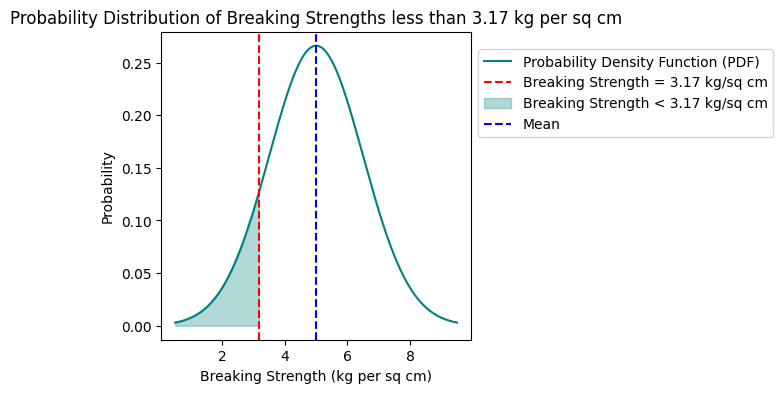

In [8]:
x = np.linspace(mean_q2 - 3*sd_q2, mean_q2 + 3*sd_q2, 1000)

pdf = stats.norm.pdf(x, mean_q2, sd_q2)

plt.figure(figsize=(4, 4))
plt.plot(x, pdf, color='teal', label='Probability Density Function (PDF)')

plt.axvline(x=3.17, color='red', linestyle='--', label='Breaking Strength = 3.17 kg/sq cm')

x_fill = np.linspace(mean_q2 - 3*sd_q2, 3.17, 100)
plt.fill_between(x_fill, stats.norm.pdf(x_fill, mean_q2, sd_q2), color='teal', alpha=0.3, label='Breaking Strength < 3.17 kg/sq cm')

plt.axvline(x=mean_q2, color='blue', linestyle='--', label='Mean')

plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Breaking Strengths less than 3.17 kg per sq cm')
plt.legend(loc='center left', bbox_to_anchor=(1, .8))  # Move legend right outside the graph
plt.grid(False)

plt.show()

In [9]:
# 2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

cdf = stats.norm.cdf(3.6,mean_q2,sd_q2)
Q2_2 = 1 - cdf
print(f'Proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm is {round(Q2_2*100,2)}%')

Proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm is 82.47%


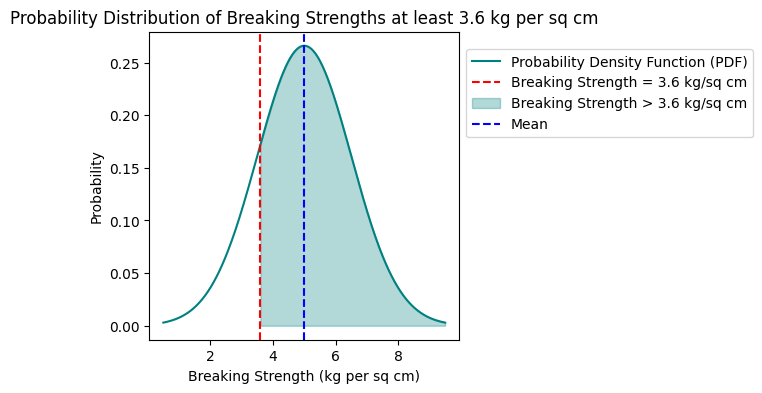

In [10]:
x = np.linspace(mean_q2 - 3*sd_q2, mean_q2 + 3*sd_q2, 1000)

plt.figure(figsize=(4, 4))
plt.plot(x, pdf, color='teal', label='Probability Density Function (PDF)')

plt.axvline(x=3.6, color='red', linestyle='--', label='Breaking Strength = 3.6 kg/sq cm')

x_fill = np.linspace(mean_q2 + 3*sd_q2, 3.6, 100)
plt.fill_between(x_fill, stats.norm.pdf(x_fill, mean_q2, sd_q2), color='teal', alpha=0.3, label='Breaking Strength > 3.6 kg/sq cm')

plt.axvline(x=mean_q2, color='blue', linestyle='--', label='Mean')

plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Breaking Strengths at least 3.6 kg per sq cm')
plt.legend(loc='center left', bbox_to_anchor=(1, .8))  # Move legend right outside the graph
plt.grid(False)

plt.show()

In [11]:
# 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

cdf1 = stats.norm.cdf(5,mean_q2,sd_q2)
cdf2 = stats.norm.cdf(5.5,mean_q2,sd_q2)
Q2_3 = cdf2 - cdf1 
print(f'Proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm is {round(Q2_3*100,2)}%')

Proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm is 13.06%


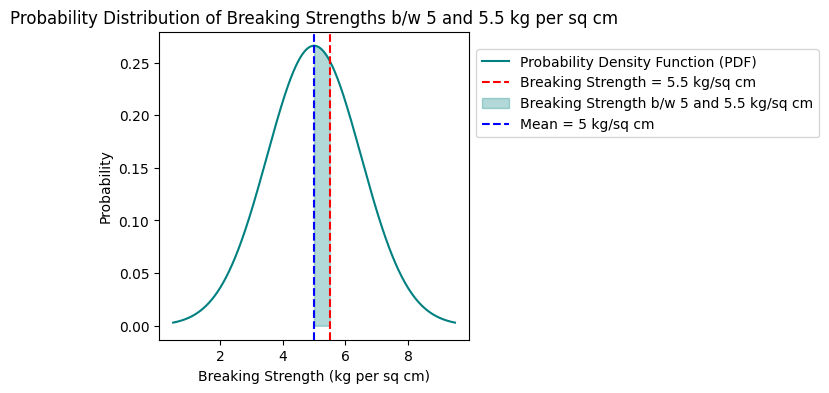

In [12]:
x = np.linspace(mean_q2 - 3*sd_q2, mean_q2 + 3*sd_q2, 1000)

plt.figure(figsize=(4, 4))
plt.plot(x, pdf, color='teal', label='Probability Density Function (PDF)')

plt.axvline(x=5.5, color='red', linestyle='--', label='Breaking Strength = 5.5 kg/sq cm')

x_fill = np.linspace(5, 5.5, 100)
plt.fill_between(x_fill, stats.norm.pdf(x_fill, mean_q2, sd_q2), color='teal', alpha=0.3, label='Breaking Strength b/w 5 and 5.5 kg/sq cm')

plt.axvline(x=mean_q2, color='blue', linestyle='--', label='Mean = 5 kg/sq cm')

# Set labels and title
plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Breaking Strengths b/w 5 and 5.5 kg per sq cm')
plt.legend(loc='center left', bbox_to_anchor=(1, .8))  # Move legend right outside the graph
plt.grid(False)

plt.show()

In [13]:
# 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

cdf3 = stats.norm.cdf(3,mean_q2,sd_q2)
cdf4 = stats.norm.cdf(7.5,mean_q2,sd_q2)
cdf4 = 1 - cdf4
Q2_4 = cdf3 + cdf4
print(f'Proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm is {round(Q2_4*100,2)}%')

Proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm is 13.9%


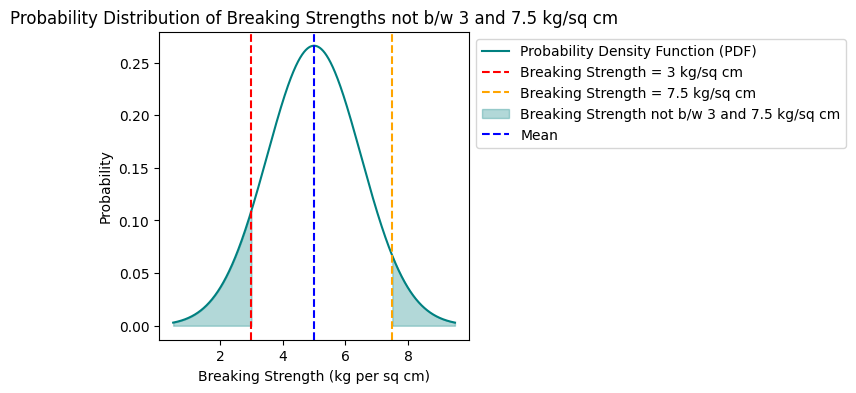

In [14]:
x = np.linspace(mean_q2 - 3*sd_q2, mean_q2 + 3*sd_q2, 1000)

plt.figure(figsize=(4, 4))
plt.plot(x, pdf, color='teal', label='Probability Density Function (PDF)')

plt.axvline(x=3, color='red', linestyle='--', label='Breaking Strength = 3 kg/sq cm')
plt.axvline(x=7.5, color='orange', linestyle='--', label='Breaking Strength = 7.5 kg/sq cm')

x_fill_left = np.linspace(mean_q2 - 3*sd_q2, 3, 100)
x_fill_right = np.linspace(7.5, mean_q2 + 3*sd_q2, 100)
plt.fill_between(x_fill_left, stats.norm.pdf(x_fill_left, mean_q2, sd_q2), color='teal', label='Breaking Strength not b/w 3 and 7.5 kg/sq cm', alpha=0.3)
plt.fill_between(x_fill_right, stats.norm.pdf(x_fill_right, mean_q2, sd_q2), color='teal', alpha=0.3)

plt.axvline(x=mean_q2, color='blue', linestyle='--', label='Mean')

plt.xlabel('Breaking Strength (kg per sq cm)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Breaking Strengths not b/w 3 and 7.5 kg/sq cm')
plt.legend(loc='center left', bbox_to_anchor=(1, .8))  # Move legend right outside the graph
plt.grid(False)

plt.show()

# Problem 3
#### Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

#### 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?
####     State the null and alternate hypotheses - Conduct the hypothesis test and compute the p-value - Write down conclusions from the test results Note: Consider the level of significance as 5%.
#### 3.2 Is the mean hardness of the polished and unpolished stones the same?
####    State the null and alternate hypotheses. - Conduct the hypothesis test. - Write down conclusions from the test results. Note: Consider the level of significance as 5%

In [15]:
zingaro_df = pd.read_csv('./Dataset 1 - Zingaro_Company.csv')
zingaro_df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [16]:
zingaro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [17]:
zingaro_df.columns

Index(['Unpolished ', 'Treated and Polished'], dtype='object')

#### From the problem statement, we can see the level of significance is 0.05 i.e., 5%. The population mean and standard deviation is not provided and the sample size is 75 which is greater than 30. So we are going to proceed with one sample t test

In [18]:
# 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. 
# Do you think Zingaro is justified in thinking so?

# Step 1: Define Null and Alternate Hypothesis
# Ho: Unpolished stone was found of adequate hardness >= 150
# Ha: Unpolished stone is not suitable for printing <150

# Step 2: Decide Level of Significance
# α = 0.05

# Step 3: Identify the test statistic
# The population mean and standard deviation is not provided and the sample size is 75 which is greater than 30. 
# So we are going to proceed with one sample t test

# Step 4: Calculate the p-value and test statistic
t_statistic, p_value = ttest_1samp(zingaro_df['Unpolished '], 150)
print('One sample t test: \nt value: {0} \np value: {1} '.format(t_statistic, p_value/2)) #p_value/2 for one tailed

# Step 5: Decide to Reject or Fail to reject the null hypothesis
# Since the p value is less than level of significance α, we reject the null hypothesis to accept alternate hypothesis

One sample t test: 
t value: -4.164629601426757 
p value: 4.171286997419652e-05 


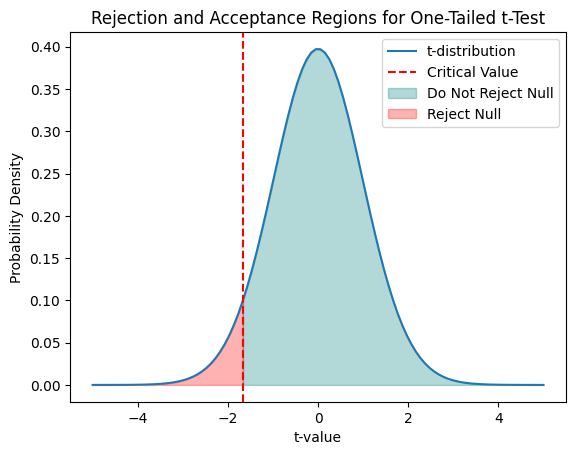

In [19]:
# Degrees of freedom (df) and significance level (alpha)
df = 75-1
alpha = 0.05

# Find the critical value
critical_val = stats.t.ppf(alpha, df)

# Plot the t-distribution
x = np.linspace(-5, 5, 100)
plt.plot(x, stats.t.pdf(x, df), label='t-distribution')

# Plot the rejection and acceptance regions
plt.axvline(x=critical_val, c='r', linestyle='--', label='Critical Value')
x_rejection = np.linspace(critical_val, 5, 50)
plt.fill_between(x_rejection, stats.t.pdf(x_rejection, df), color='teal', alpha=0.3, label='Do Not Reject Null')
plt.fill_between(x, stats.t.pdf(x, df), where=(x <= critical_val), color='red', alpha=0.3, label='Reject Null')

# Add labels and legend
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('Rejection and Acceptance Regions for One-Tailed t-Test')
plt.legend()

plt.show()

##### As the t values lies in the rejection region and also from the above hypothesis testing, we can conclude that unpolished stones are not suitable for printing i.e., we reject the null hypothesis. So, Zingaro has a reason to believe that the unpolished stones may not be suitable for printing.

In [20]:
# 3.2 Is the mean hardness of the polished and unpolished stones the same?

# Step 1: Define Null and Alternate Hypothesis
# Ho: The mean hardness of the polished stones = The mean hardness of the unpolished stones the same
# Ha: The mean hardness of the polished stones != The mean hardness of the unpolished stones the same

# Step 2: Decide Level of Significance
# α = 0.05

# Step 3: Identify the test statistic
# The population mean and standard deviation is not provided and the sample size is 75 which is greater than 30 and 
# we have two independent groups. 
# So we are going to proceed with Independent two sample t test

# Step 4: Calculate the p-value and test statistic
t_statistic, p_value = ttest_ind(zingaro_df['Unpolished '], zingaro_df['Treated and Polished'])
print('Independent Two sample t test: \nt value: {0} \np value: {1} '.format(t_statistic, p_value)) #p_value/2 for one tailed

# Step 5: Decide to Reject or Fail to reject the null hypothesis
# Since the p value is less than level of significance α, we reject the null hypothesis to accept alternate hypothesis

Independent Two sample t test: 
t value: -3.2422320501414053 
p value: 0.0014655150194628353 


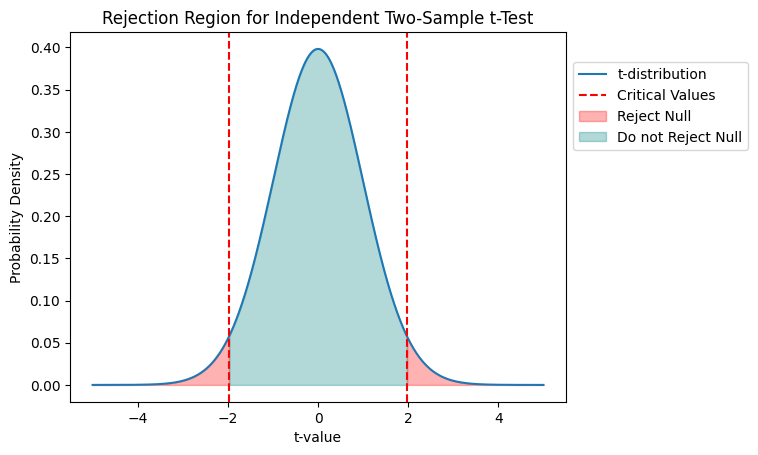

In [21]:
mean1, std1, n1 = np.mean(zingaro_df['Unpolished ']), np.std(zingaro_df['Unpolished ']), 75
mean2, std2, n2 = np.mean(zingaro_df['Treated and Polished']), np.std(zingaro_df['Treated and Polished']), 75

df, alpha = n1 + n2 - 2, 0.05
s_pooled = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
std_error = s_pooled * np.sqrt(1/n1 + 1/n2)
t_statistic = (mean1 - mean2) / std_error
critical_val = stats.t.ppf(1 - alpha/2, df)

x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.t.pdf(x, df), label='t-distribution')
plt.axvline(x=critical_val, color='r', linestyle='--', label='Critical Values')
plt.axvline(x=-critical_val, color='r', linestyle='--')

x_rejection_left = np.linspace(-5, -critical_val, 100)
x_rejection_right = np.linspace(critical_val, 5, 100)

plt.fill_between(x_rejection_left, stats.t.pdf(x_rejection_left, df), color='red', alpha=0.3, label='Reject Null')
plt.fill_between(x_rejection_right, stats.t.pdf(x_rejection_right, df), color='red', alpha=0.3)
plt.fill_between(x, stats.t.pdf(x, df), where=(x > -critical_val) & (x < critical_val), color='teal', alpha=0.3, label='Do not Reject Null')

plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('Rejection Region for Independent Two-Sample t-Test')
plt.legend(loc='center left', bbox_to_anchor=(1, .8))

plt.show()

##### As the t value lies in the rejection region and also from the above hypothesis testing, we can conclude that the mean hardness of the polished and unpolished stones are not the same i.e., we reject the null hypothesis.

# Problem 4

#### Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

#### 4.1 How does the hardness of implants vary depending on dentists?

#### 4.2 How does the hardness of implants vary depending on methods?

#### 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

#### 4.4 How does the hardness of implants vary depending on dentists and methods together?

In [22]:
dental_df = pd.read_excel('./Dataset 2 - Dental Hardness Data.xlsx')

In [23]:
dental_df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [24]:
dental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [25]:
for i in dental_df.columns:
    print (dental_df[i].value_counts());
    print ('\n');

Dentist
1    18
2    18
3    18
4    18
5    18
Name: count, dtype: int64


Method
1    30
2    30
3    30
Name: count, dtype: int64


Alloy
1    45
2    45
Name: count, dtype: int64


Temp
1500    30
1600    30
1700    30
Name: count, dtype: int64


Response
743     6
792     6
813     5
835     5
715     5
824     4
752     3
681     3
870     3
772     3
698     3
782     3
858     3
762     2
707     2
312     2
405     2
933     2
882     2
907     2
847     2
665     2
803     2
690     1
483     1
421     1
1048    1
289     1
1115    1
493     1
894     1
649     1
613     1
724     1
620     1
627     1
734     1
673     1
560     1
585     1
536     1
Name: count, dtype: int64




In [26]:
dental_df.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


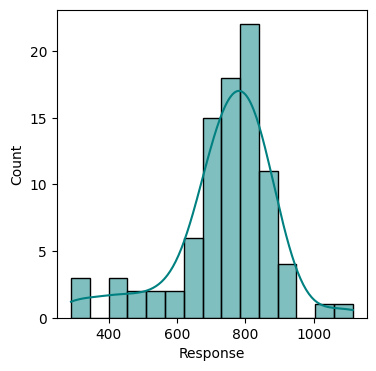

In [27]:
plt.figure(figsize=(4,4))
sns.histplot(dental_df['Response'], kde=True, color='teal');

In [28]:
dental_df.columns

Index(['Dentist', 'Method', 'Alloy', 'Temp', 'Response'], dtype='object')

#### First we will change the datatype of categorical columns to Categorical

In [29]:
dental_df['Dentist'] = pd.Categorical(dental_df['Dentist'])
dental_df['Method'] = pd.Categorical(dental_df['Method'])
dental_df['Alloy'] = pd.Categorical(dental_df['Alloy'])
dental_df['Temp'] = pd.Categorical(dental_df['Temp'])

In [30]:
dental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.8 KB


#### We will separate the dataset into two based on the type of alloy

In [31]:
alloy1 = dental_df[dental_df['Alloy']==1][['Dentist', 'Method', 'Temp', 'Response']]
alloy2 = dental_df[dental_df['Alloy']==2][['Dentist', 'Method', 'Temp', 'Response']]

In [32]:
alloy1.head()

,Dentist,Method,Temp,Response
0,1,1,1500,813
1,1,1,1600,792
2,1,1,1700,792
6,1,2,1500,782
7,1,2,1600,698


In [33]:
alloy2.head()

,Dentist,Method,Temp,Response
3,1,1,1500,907
4,1,1,1600,792
5,1,1,1700,835
9,1,2,1500,1115
10,1,2,1600,835


In [34]:
alloy1.describe()

,Response
count,45.000000
mean,707.488889
std,121.194551
min,289.000000
25%,681.000000
50%,743.000000
75%,782.000000
max,882.000000


In [35]:
alloy2.describe()

,Response
count,45.000000
mean,776.066667
std,160.892595
min,312.000000
25%,715.000000
50%,824.000000
75%,858.000000
max,1115.000000


### Shapiro-Wilk Test

##### Null Hypothesis : The population from which the sample was drawn follows a normal distribution.
##### Alternative Hypothesis : The population from which the sample was drawn does not follow a normal distribution.

In [36]:
# Shapiro test for 2 types of alloys

shapiro_alloy1 = stats.shapiro(alloy1['Response'])
shapiro_alloy2 = stats.shapiro(alloy2['Response'])

print('Alloy 1 ---> ',shapiro_alloy1)
print('Alloy 2 ---> ',shapiro_alloy2)

Alloy 1 --->  ShapiroResult(statistic=0.8304629921913147, pvalue=1.1945070582441986e-05)
Alloy 2 --->  ShapiroResult(statistic=0.887769341468811, pvalue=0.00040293222991749644)


#### p-value is less than alpha = 0.05, that means, we reject the null hypothesis & the observations are not normally distributed. Hence the Shapiro-Wilk's test fails

### Levene's Test
##### Computes homogeneity of variance across groups.

##### Null Hypothesis: $H_0$ -The variances in the given dataset is the same
##### Alternative Hypothesis: $H_A$ - The variances in the given dataset is different 

In [37]:
LT = stats.levene(alloy1['Response'], alloy2['Response'])
print(LT)

LeveneResult(statistic=1.4194717470917784, pvalue=0.23669380462584474)


#### Since p-value is greater than 0.05, we shall proceed with null hypothesis that the variances are the same

## 4.1 Formulate the Null and Alternate Hypothesis

##### Null Hypothesis $H_0$ : There is no difference in means among the dentists in terms of implant hardness

##### Alternate Hypothesis $H_A$ : There is a difference in means among the dentists in terms of implant hardness

#### We are going to proceed with One-Way ANOVA for the two types of Alloys separately 

### Alloy 1

#### Hypothesis Test for Alloy 1 data 
#### • Null hypothesis $H_0$ : There is no difference in means among the dentists in terms of implant hardness for Alloy 1. 
#### • Alternative hypothesis $H_A$ : There is a difference in means among the dentists in terms of implant hardness for Alloy 1.

In [38]:
# For Alloy 1

formula_alloy_dentist = 'Response ~ C(Dentist)' ## y = f(X)
model_alloy1_dentist = ols(formula_alloy_dentist, alloy1).fit()
aov_table_alloy1_dentist = anova_lm(model_alloy1_dentist)
print(aov_table_alloy1_dentist)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [39]:
# Alternative method for alloy 1
# Create an empty list to store response variables
response_variables_alloy1 = []

# Iterate over each level of 'Dentist' and assign response variables
for dentist_level in range(1, 6):  # Assuming 'Dentist' levels are from 1 to 5
    response_variable = alloy1[alloy1['Dentist'] == dentist_level]['Response']
    response_variables_alloy1.append(response_variable)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*response_variables_alloy1) 
# * is an unpacking operator in python, which unpacks list and pass them as separate arguments

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 1.9771119908770842
P-value: 0.11656712140267628


### Alloy 2

#### Hypothesis Test for Alloy 1 data 
#### • Null hypothesis $H_0$ : There is no difference in means among the dentists in terms of implant hardness for Alloy 2. 
#### • Alternative hypothesis $H_A$ : There is a difference in means among the dentists in terms of implant hardness for Alloy 2.

In [40]:
# For Alloy 2

model_alloy2_dentist = ols(formula_alloy_dentist, alloy2).fit()
aov_table_alloy2_dentist = anova_lm(model_alloy2_dentist)
print(aov_table_alloy2_dentist)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


In [41]:
# Alternative method for alloy 2
# Create an empty list to store response variables
response_variables_alloy2 = []

# Iterate over each level of 'Dentist' and assign response variables
for dentist_level in range(1, 6):  # Assuming 'Dentist' levels are from 1 to 5
    response_variable = alloy2[alloy2['Dentist'] == dentist_level]['Response']
    response_variables_alloy2.append(response_variable)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*response_variables_alloy2)
# * is an unpacking operator in python, which unpacks list and pass them as separate arguments

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 0.5248351000282961
P-value: 0.7180309510793431


#### As the p-value for both types of alloys are greater than the level of significance, we fail to reject the null hypothesis in both cases. So we can conclude that there is no difference in means among the dentists in terms of implant hardness for Alloy 1 & Alloy 2.

## 4.2 Formulate the Null and Alternate Hypothesis

##### Null Hypothesis $H_0$ : There is no difference in means among the methods in terms of implant hardness

##### Alternate Hypothesis $H_A$ : There is a difference in means among the methods in terms of implant hardness

#### We are going to proceed with One-Way ANOVA for the two types of Alloys separately 

### Alloy 1

#### Hypothesis Test for Alloy 1 data 
#### • Null hypothesis $H_0$ : There is no difference in means among the methods in terms of implant hardness for Alloy 1. 
#### • Alternative hypothesis $H_A$ : There is a difference in means among the methods in terms of implant hardness for Alloy 1.

In [42]:
# For Alloy 1

formula_alloy_method = 'Response ~ C(Method)' ## y = f(X)

model_alloy1_method = ols(formula_alloy_method, alloy1).fit()
aov_table_alloy1_method = anova_lm(model_alloy1_method)
print(aov_table_alloy1_method)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [43]:
# Alternative method for alloy 1
# Create an empty list to store response variables
method_response_variables_alloy1 = []

# Iterate over each level of 'Dentist' and assign response variables
for method_level in range(1, 4):  # Assuming 'Method' levels are from 1 to 3
    method_response_variable = alloy1[alloy1['Method'] == method_level]['Response']
    method_response_variables_alloy1.append(method_response_variable)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*method_response_variables_alloy1) 
# * is an unpacking operator in python, which unpacks list and pass them as separate arguments

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 6.263326635486233
P-value: 0.004163412167505543


### Alloy 2

#### Hypothesis Test for Alloy 1 data 
#### • Null hypothesis $H_0$ : There is no difference in means among the methods in terms of implant hardness for Alloy 2. 
#### • Alternative hypothesis $H_A$ : There is a difference in means among the methods in terms of implant hardness for Alloy 2.

In [44]:
# For Alloy 2

model_alloy2_method = ols(formula_alloy_method, alloy2).fit()
aov_table_alloy2_method = anova_lm(model_alloy2_method)
print(aov_table_alloy2_method)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [45]:
# Alternative method for alloy 2
# Create an empty list to store response variables
method_response_variables_alloy2 = []

# Iterate over each level of 'Dentist' and assign response variables
for method_level in range(1, 4):  # Assuming 'Method' levels are from 1 to 3
    method_response_variable = alloy2[alloy2['Method'] == method_level]['Response']
    method_response_variables_alloy2.append(method_response_variable)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*method_response_variables_alloy2) 
# * is an unpacking operator in python, which unpacks list and pass them as separate arguments

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 16.41079988438482
P-value: 5.415871051443187e-06


#### As the p-value for both types of alloys are lesser than the level of significance, we reject the null hypothesis in both cases. So we can conclude that there is difference in means among the methods in terms of implant hardness for Alloy 1 & Alloy 2.

#### As the p value is less than 0.05, we can proceed with Tukey HSD test

### Tukey Honest Significant Difference

In [46]:
compare = MultiComparison(alloy1['Response'], alloy1['Method'])
result = compare.tukeyhsd()
print(result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


In [47]:
compare = MultiComparison(alloy2['Response'], alloy2['Method'])
result = compare.tukeyhsd()
print(result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


## 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

Text(0.5, 1.0, 'Interaction b/w Dentist vs Method vs Response - Alloy1')

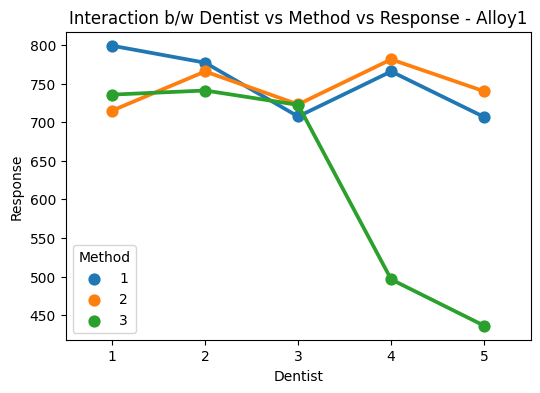

In [48]:
plt.figure(figsize=(6,4))
sns.pointplot(x='Dentist', y='Response', data=alloy1, hue='Method',ci=None);
plt.title('Interaction b/w Dentist vs Method vs Response - Alloy1')

#### •	The response pattern for Method 2 is relatively stable compared to the other methods, with no drastic increases or decreases.
#### •	We can clearly see drastic decrease in response for Method 3 in the case of Dentist 4 and 5
#### •	Dentist 1 shows a consistent increase in response from Method 1 to Method 3.
#### •	Dentist 2 has the highest response for Method 1, slightly decreasing for Methods 2 and 3.
#### •	Dentist 3's response peaks at Method 2, with Method 3 showing a significant drop.
#### •	Dentist 5 shows a drastic decrease in response when moving from Method 1 to Method 3.
#### •	The overall highest response is observed with Dentist 1 using Method 2.
#### •	The overall lowest response is observed with Dentist 5 using Method 3.

Text(0.5, 1.0, 'Interaction b/w Dentist vs Method vs Response - Alloy 2')

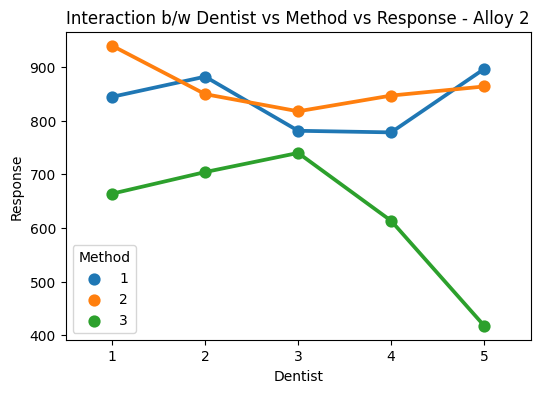

In [49]:
plt.figure(figsize=(6,4))
sns.pointplot(x='Dentist', y='Response', data=alloy2, hue='Method',ci=None);
plt.title('Interaction b/w Dentist vs Method vs Response - Alloy 2')

#### •	The response pattern for Method 2 is relatively stable compared to the other methods, with no drastic increases or decreases.
#### •	We can clearly see drastic decrease in response for Method 3 in the case of Dentist 4 and 5
#### •	Dentist 1 shows a consistent increase in response from Method 1 to Method 2.
#### •	Dentist 2 has the highest response for Method 1, slightly decreasing for Method 2.
#### •	Dentist 3's response peaks at Method 2, with Method 3 showing a significant drop.
#### •	Dentist 5 shows a drastic decrease in response when moving from Method 1 to Method 3.
#### •	The overall highest response is observed with Dentist 1 using Method 2.
#### •	The overall lowest response is observed with Dentist 5 using Method 3.

## 4.4 How does the hardness of implants vary depending on dentists and methods together?

##### Null Hypothesis $H_0$ : There is no difference in mean hardness of implants depending on dentists and methods together

##### Alternate Hypothesis $H_A$ : There is a difference in mean hardness of implants depending on dentists and methods together

#### We are choosing Two Way Anova, as we have 2 factors(independent variables) and a continuous dependent variable

### Alloy 1

#### Hypothesis Test for Alloy 1 data 
#### • Null hypothesis $H_0$ : There is no difference in mean hardness of implants depending on dentists and methods together for Alloy 1. 
#### • Alternative hypothesis $H_A$ : There is a difference in mean hardness of implants depending on dentists and methods together for Alloy 1.

In [50]:
formula_2way = 'Response ~ C(Dentist) + C(Method)'
model_2way_alloy1 = ols(formula_2way, alloy1).fit()
aov_table_2way_alloy1 = anova_lm(model_2way_alloy1)
print(aov_table_2way_alloy1)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  2.591255  0.051875
C(Method)    2.0  148472.177778  74236.088889  7.212522  0.002211
Residual    38.0  391121.377778  10292.667836       NaN       NaN


##### Upon conducting the test, we obtained a p-value of 0.0022 for the Method factor, which is below the significance level of 0.05. Thus, we have ample evidence to reject the null hypothesis, indicating that at least one pair of Method means differs for Alloy 1, and it significantly affects the Response. Conversely, the p-value for the Dentist factor is 0.051, surpassing the 0.05 threshold. Consequently, we cannot reject the null hypothesis, suggesting no variance in the mean hardness of implants based on dentists.

### Alloy 2

#### Hypothesis Test for Alloy 2 data 
#### • Null hypothesis $H_0$ : There is no difference in mean hardness of implants depending on dentists and methods together for Alloy 2.
#### • Alternative hypothesis $H_A$ : There is difference in mean hardness of implants depending on dentists and methods together for Alloy 2.

In [51]:
model_2way_alloy2 = ols(formula_2way, alloy2).fit()
aov_table_2way_alloy2 = anova_lm(model_2way_alloy2)
print(aov_table_2way_alloy2)

              df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)   4.0   56797.911111   14199.477778   0.926215  0.458933
C(Method)    2.0  499640.400000  249820.200000  16.295479  0.000008
Residual    38.0  582564.488889   15330.644444        NaN       NaN


##### After testing, we found a p-value of 0.000008 for the Method factor, which is below the significance level of 0.05. This suggests that at least one pair of Method means differs for Alloy 2, and it does significantly affect the Response. Conversely, the p-value for the Dentist factor is 0.458, below the 0.05 threshold. Therefore, we reject the null hypothesis, indicating variance in the mean hardness of implants based on dentists. 

#### As the p-value for both types of alloys are lesser than the level of significance, we reject the null hypothesis in both cases. So we can conclude that there is difference in means among the methods in terms of implant hardness for Alloy 1 & Alloy 2.

#### As the p value is less than 0.05, we can proceed with Tukey HSD test

Text(0.5, 1.0, 'Interaction b/w Dentist vs Method vs Response - Alloy1')

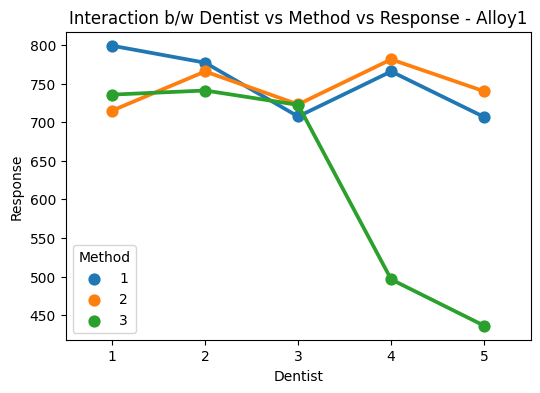

In [52]:
plt.figure(figsize=(6,4))
sns.pointplot(x='Dentist', y='Response', data=alloy1, hue='Method', ci=None);
plt.title('Interaction b/w Dentist vs Method vs Response - Alloy1')

Text(0.5, 1.0, 'Interaction b/w Dentist vs Method vs Response - Alloy 2')

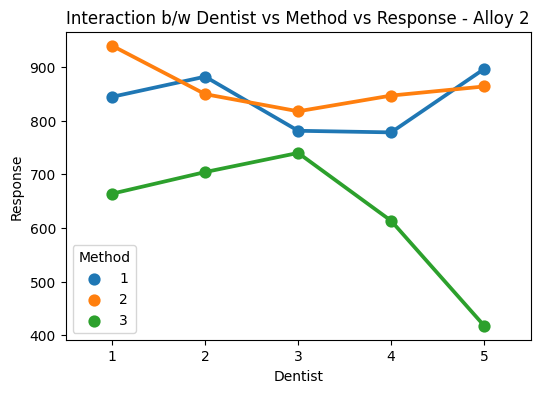

In [53]:
plt.figure(figsize=(6,4))
sns.pointplot(x='Dentist', y='Response', data=alloy2, hue='Method',ci=None);
plt.title('Interaction b/w Dentist vs Method vs Response - Alloy 2')

In [54]:
formula_2way_1 = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'

model_2way_1 = ols(formula_2way_1, alloy1).fit()
aov_table_2way_1 = anova_lm(model_2way_1)
print(aov_table_2way_1)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


In [55]:
model_2way_2 = ols(formula_2way_1, alloy2).fit()
aov_table_2way_2 = anova_lm(model_2way_2)
print(aov_table_2way_2)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


#### Due to the inclusion of the interaction effect term, we can see a change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms. 

## THANK YOU!